#Rossmann Store Sales

##Data fields

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* Id - an Id that represents a (Store, Date) duple within the test set
* Store - a unique Id for each store
* Sales - the turnover for any given day (this is what you are predicting)
* Customers - the number of customers on a given day
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes an assortment level: a = basic, b = extra, c = extended
* CompetitionDistance - distance in meters to the nearest competitor store
* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Promo - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [5]:
store = pd.read_csv('data/store.csv')

In [6]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,NaN,NaN,NaN
4,5,a,a,29910,4,2015,0,NaN,NaN,NaN
5,6,a,a,310,12,2013,0,NaN,NaN,NaN
6,7,a,c,24000,4,2013,0,NaN,NaN,NaN
7,8,a,a,7520,10,2014,0,NaN,NaN,NaN
8,9,a,c,2030,8,2000,0,NaN,NaN,NaN
9,10,a,a,3160,9,2009,0,NaN,NaN,NaN


In [7]:
train = pd.read_csv('data/train.csv')

/Library/Python/2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [8]:
train.sort(['Store','Date'])

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1016095,1,2,2013-01-01,0,0,0,0,a,1
1014980,1,3,2013-01-02,5530,668,1,0,0,1
1013865,1,4,2013-01-03,4327,578,1,0,0,1
1012750,1,5,2013-01-04,4486,619,1,0,0,1
1011635,1,6,2013-01-05,4997,635,1,0,0,1
1010520,1,7,2013-01-06,0,0,0,0,0,1
1009405,1,1,2013-01-07,7176,785,1,1,0,1
1008290,1,2,2013-01-08,5580,654,1,1,0,1
1007175,1,3,2013-01-09,5471,626,1,1,0,1
1006060,1,4,2013-01-10,4892,615,1,1,0,1


In [9]:
train['value'] = train['Sales']/train['Customers']

In [10]:
train.sort(['Store','Date'])

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,value
1016095,1,2,2013-01-01,0,0,0,0,a,1,NaN
1014980,1,3,2013-01-02,5530,668,1,0,0,1,8.278443
1013865,1,4,2013-01-03,4327,578,1,0,0,1,7.486159
1012750,1,5,2013-01-04,4486,619,1,0,0,1,7.247173
1011635,1,6,2013-01-05,4997,635,1,0,0,1,7.869291
1010520,1,7,2013-01-06,0,0,0,0,0,1,NaN
1009405,1,1,2013-01-07,7176,785,1,1,0,1,9.141401
1008290,1,2,2013-01-08,5580,654,1,1,0,1,8.532110
1007175,1,3,2013-01-09,5471,626,1,1,0,1,8.739617
1006060,1,4,2013-01-10,4892,615,1,1,0,1,7.954472


In [11]:
train_1=train[train['Store']==1]

In [12]:
train_1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,value
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883
1115,1,4,2015-07-30,5020,546,1,1,0,1,9.194139
2230,1,3,2015-07-29,4782,523,1,1,0,1,9.143403
3345,1,2,2015-07-28,5011,560,1,1,0,1,8.948214
4460,1,1,2015-07-27,6102,612,1,1,0,1,9.970588
5575,1,7,2015-07-26,0,0,0,0,0,0,NaN
6690,1,6,2015-07-25,4364,500,1,0,0,0,8.728000
7805,1,5,2015-07-24,3706,459,1,0,0,0,8.074074
8920,1,4,2015-07-23,3769,503,1,0,0,0,7.493042
10035,1,3,2015-07-22,3464,463,1,0,0,0,7.481641


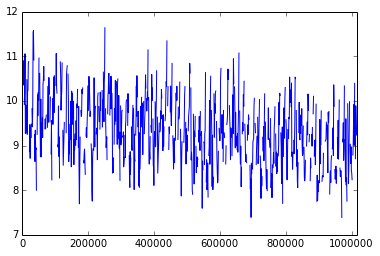

In [16]:
train[train['Store']==10]['value'].plot()

In [18]:
np.nan==np.nan

False